In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
import pandas as pd
from scipy import integrate
import numpy.matlib
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics

!pip install git+https://github.com/gjpelletier/delta_method.git


from delta_method import delta_method, parametric_bootstrap
import scipy
from scipy.stats import sem

plt.style.use("seaborn-v0_8-white")
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 5

  Cloning https://github.com/gjpelletier/delta_method.git to /private/var/folders/bb/wr56q1rs761cp34pzwpk8r740000gn/T/pip-req-build-789sdakw
  Running command git clone --filter=blob:none --quiet https://github.com/gjpelletier/delta_method.git /private/var/folders/bb/wr56q1rs761cp34pzwpk8r740000gn/T/pip-req-build-789sdakw
  Resolved https://github.com/gjpelletier/delta_method.git to commit 0abf5f0a45f7863e9c1970675be6569280eae198
  Preparing metadata (setup.py) ... done


## Code that compares the infection-free growth curves of the control and pseudolysogen 

## Experimental OD values 

In [4]:
Control_1 = [0,0.04,0.102,0.18,0.225,0.302,0.37,0.38,0.412,0.424,0.4,0.394,0.41]

Control_2 = [0,0.041,0.132,0.165,0.248,0.34,0.41,0.41,0.466,0.444,0.415,0.39,0.38]

Control_3 = [0,0.042,0.154,0.17,0.265,0.334,0.38,0.412,0.472,0.45,0.45,0.404,0.408]

Control_Mean = []
Control_Sigma = []
for i in range(len(Control_1)):
    Control_Mean.append((Control_1[i] + Control_2[i] + Control_3[i])/3)  
    Control_Sigma.append(np.std([Control_1[i],Control_2[i],Control_3[i]]))

In [5]:
Pseudo_1 = [0,0.018,0.09,0.174,0.225,0.308,0.38,0.4,0.425,0.455,0.452,0.412,0.384]

Pseudo_2 = [0,0.01,0.108,0.125,0.23,0.315,0.358,0.412,0.46,0.458,0.43,0.39,0.406]

Pseudo_3 = [0,0.05,0.122,0.202,0.256,0.37,0.388,0.42,0.475,0.462,0.446,0.438,0.394]

Pseudo_Mean = []
Pseudo_Sigma = []
for i in range(len(Pseudo_1)):
    Pseudo_Mean.append((Pseudo_1[i] + Pseudo_2[i] + Pseudo_3[i])/3)
    Pseudo_Sigma.append(np.std([Pseudo_1[i],Pseudo_2[i],Pseudo_3[i]]))

In [6]:
times = [0,29,44.5,54.5,69,77.5,91.5,102.5,120,150,174.5,197,224]

In [7]:
Control_Sigma[0] = 10**-5
Pseudo_Sigma[0] = 10**-5

In [8]:
x_new = np.linspace(0,240)
def logifunc(x,A,x0,k,off):
    return A/ (1 + np.exp(-k*(x-x0)))+off
x_times= np.array(times)

y_control = np.array(Control_Mean)

param_bounds = ([0.45,0,0,-np.inf],[0.46,np.inf,np.inf,np.inf])
popt, pcov = curve_fit(logifunc, x_times, y_control,sigma = Control_Sigma, absolute_sigma = True, bounds  = param_bounds, p0 = ([0.455,50, 0.04, 0]), method="trf",maxfev = 10000)
y_fit_control = logifunc(x_new, *popt)

## Fitting control data to logistic growth and getting the confidence intervals using Delta Method 

The best-fit nonlinear regression equation is as follows:
y = (0.45-0.1)/(1+exp(-0.45*(x-62.17))+0.1
r^2 = 0.9808, p = 4.81e-08
std err of the regression = 0.0252


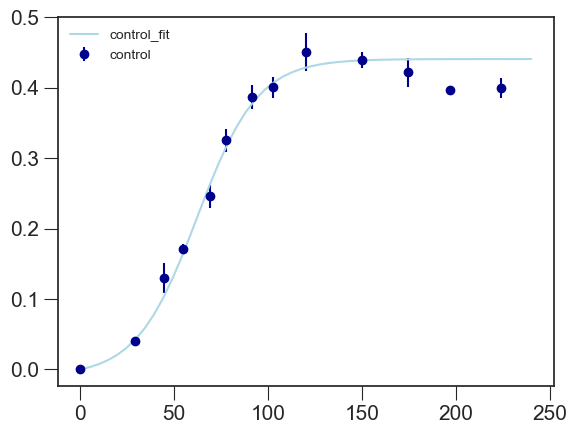

In [10]:

alpha = 0.01
d = delta_method(pcov,popt,x_new,logifunc,x_times,y_control,alpha)

y_new_control = d['y_new']
lwr_conf = d['lwr_conf']
upr_conf = d['upr_conf']
lwr_pred = d['lwr_pred']
upr_pred = d['upr_pred']
rsquared = d['rsquared']
pvalue = d['pvalue']
syx = d['syx']

# make string values of fit stats and eqn for the plot labels
pstr = '%.2e' %pvalue
rsqstr = '%.4f' %rsquared

b2str = '%.2f' %popt[0]
b3str = '%.2f' %popt[1]
b4str = '%.1f' %popt[2]
syxstr = '%.4f' %syx
eqnstr = 'y = (' + str(0.45) + '-' + b4str + ')/(1+exp(-' + b2str + '*(x-' + b3str + '))+' + b4str

print('The best-fit nonlinear regression equation is as follows:')
print(eqnstr)
print('r^2 = '+ rsqstr +', p = '+ pstr)
print('std err of the regression = '+ syxstr)
plt.errorbar(times, Control_Mean, yerr = Control_Sigma,label = 'control', fmt = 'o', color = 'darkblue')
plt.plot(x_new,y_fit_control, label = 'control_fit', color = 'lightblue')
plt.legend(loc = 'upper left')

## Fitting pseudolysogen data to logistic growth and getting the confidence intervals using Delta Method 

In [12]:

y_pseudo = np.array(Pseudo_Mean)

popt, pcov = curve_fit(logifunc, x_times, y_pseudo, sigma = Pseudo_Sigma, absolute_sigma = True, bounds  = param_bounds, p0 = ([0.455,50, 0.04, 0]), method="trf",maxfev = 10000)
y_fit_pseudo= logifunc(x_new, *popt)


The best-fit nonlinear regression equation is as follows:
y = (0.45-0.1)/(1+exp(-0.46*(x-64.92))+0.1
r^2 = 0.9808, p = 4.81e-08
std err of the regression = 0.0252


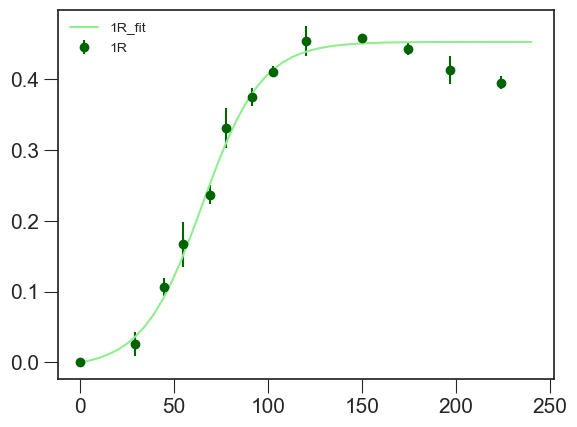

In [13]:
x_new = np.linspace(0,240)
d = delta_method(pcov,popt,x_new,logifunc,x_times,y_control,alpha)

y_new_pseudo = d['y_new']
lwr_conf2 = d['lwr_conf']
upr_conf2 = d['upr_conf']
lwr_pred2= d['lwr_pred']
upr_pred2 = d['upr_pred']
rsquared2= d['rsquared']
pvalue2 = d['pvalue']
syx2 = d['syx']

# make string values of fit stats and eqn for the plot labels
pstr2 = '%.2e' %pvalue
rsqstr2 = '%.4f' %rsquared
b2str2 = '%.2f' %popt[0]
b3str2 = '%.2f' %popt[1]
b4str2 = '%.1f' %popt[2]
syxstr2 = '%.4f' %syx
eqnstr2 = 'y = (' + str(0.45) + '-' + b4str2 + ')/(1+exp(-' + b2str2 + '*(x-' + b3str2 + '))+' + b4str

print('The best-fit nonlinear regression equation is as follows:')
print(eqnstr2)
print('r^2 = '+ rsqstr2 +', p = '+ pstr2)
print('std err of the regression = '+ syxstr2)
plt.errorbar(times, Pseudo_Mean, yerr = Pseudo_Sigma,label = '1R', fmt = 'o', color = 'darkgreen')
plt.plot(x_new,y_fit_pseudo, label = '1R_fit', color = 'lightgreen')
plt.legend(loc = 'upper left')


## Placing control data in 99% CI of pseudolysogen data and vice versa 

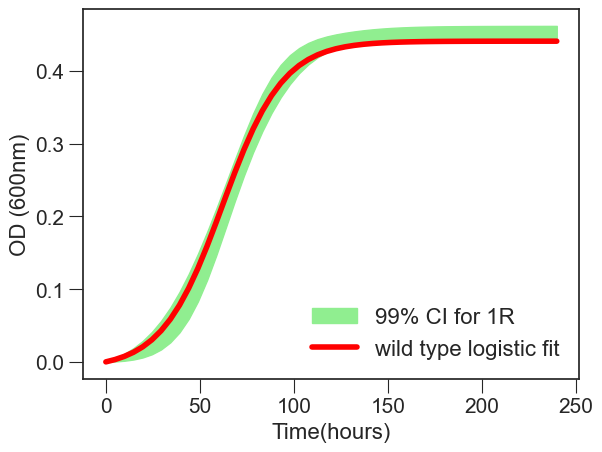

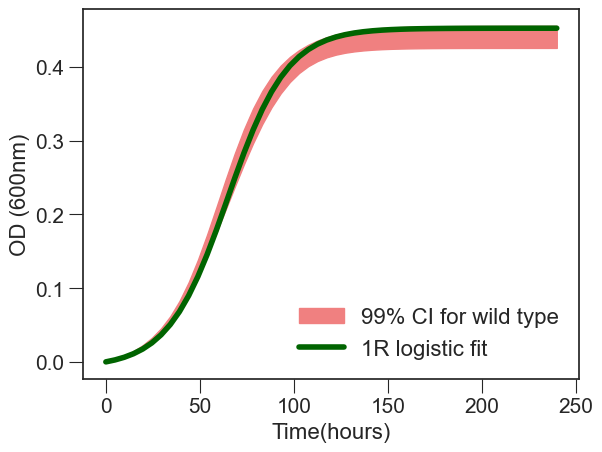

In [15]:
# plot the results
plt.figure()
# 95% confidence limits
plt.fill_between(x_new, lwr_conf2 , upr_conf2,color="lightgreen", label=str(int(100*(1-alpha)))+'% CI for 1R')
#plt.fill_between(x_new, lwr_conf , upr_conf,color="lightblue", label=str(int(100*(1-alpha)))+'% CI for wild-type')
#plt.scatter(times, Control_Mean,label = 'wild type observations', color = 'green')
#plt.plot(times,y_fit_pseudo, label = '1R logistic fit', color = 'darkgreen')
plt.plot(x_new,y_fit_control, label = 'wild type logistic fit', color = 'red',linewidth=4.0)


plt.legend(loc='lower right', fontsize = 16)
plt.ticklabel_format(style='plain', axis='y');

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
# plot the results
plt.xlabel('Time(hours)', fontsize = 16)
plt.ylabel('OD (600nm)', fontsize = 16)
plt.savefig('wildtype_overlayed_1rconf.png', bbox_inches = "tight")
plt.figure()
# 95% confidence limits
#plt.fill_between(x_new, lwr_conf2 , upr_conf2,color="lightgreen", label=str(int(100*(1-alpha)))+'% CI for 1R')
plt.fill_between(x_new, lwr_conf , upr_conf,color="lightcoral", label=str(int(100*(1-alpha)))+'% CI for wild type')
#plt.scatter(times, Pseudo_Mean,label = '1R', color = 'green')
plt.plot(x_new,y_fit_pseudo, label = '1R logistic fit', color = 'darkgreen',linewidth=4.0)
#plt.plot(times,y_fit_control, label = 'control logistic fit', color = 'darkblue')


plt.legend(loc='lower right', fontsize = 16)
plt.ticklabel_format(style='plain', axis='y');
plt.xlabel('Time(hours)', fontsize = 16)
plt.ylabel('OD (600nm)', fontsize = 16)
plt.savefig('1R_overlayed_wildtypeconf.png', bbox_inches = "tight")
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));